In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import sqlite3
import os
from itertools import combinations
from datetime import datetime, timedelta
from IPython.display import Image

In [2]:
def generate_id(prefix, num):
    return f"{prefix}{num:03d}"

def random_string(length):
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return ''.join(random.choice(letters) for i in range(length))

def query_db(query, params=()):
    conn = sqlite3.connect('clash_royale.db')
    df = pd.read_sql_query(query, conn, params=params)
    conn.close()
    return df

def generate_random_battle_duration():
    # Gerar uma duração aleatória em segundos entre 0 e 5 minutos (0 a 300 segundos)
    duration_seconds = random.randint(0, 300)
    
    # Converter para um objeto timedelta
    duration = timedelta(seconds=duration_seconds)
    
    return duration

def ilustra(card_id):
    foto = df_cards.loc[df_cards['cardId'] == card_id, 'iconUrl'].iloc[-1]
    descricao = df_cards.loc[df_cards['cardId'] == card_id, 'description'].iloc[-1]
    display(Image(foto))
    print(descricao, '\n')

In [3]:
descricoes_para_cartas = [
    "O Dragão Infernal queima tudo em seu caminho com um raio de fogo concentrado, deixando apenas cinzas.",
    "O Mago de Gelo congela seus inimigos com uma rajada de frio ártico, desacelerando seus movimentos.",
    "O Cavaleiro Fantasma emerge das sombras para causar dano letal antes de desaparecer sem deixar rastros.",
    "A Bruxa Sombria convoca morcegos das trevas enquanto lança feitiços devastadores contra seus oponentes.",
    "O Golem de Pedra avança lentamente, mas explode em mini-golems quando derrotado, continuando a batalha.",
    "A Princesa atira flechas flamejantes de longa distância, atingindo inimigos antes que eles a vejam.",
    "O Barril de Esqueletos lança um exército de esqueletos direto na linha de frente inimiga.",
    "O P.E.K.K.A. é uma máquina de combate blindada com uma espada gigante que corta qualquer coisa em seu caminho.",
    "O Gigante Real lança pedras enormes de sua besta, derrubando torres com facilidade.",
    "Os Três Mosqueteiros são uma força formidável, disparando uma chuva de balas que pode derrubar qualquer exército.",
    "O Lenhador enlouquecido derruba inimigos com seu machado, deixando uma poça de fúria ao ser derrotado.",
    "A Bandida desliza pelo campo de batalha, desferindo golpes críticos em suas vítimas antes de desaparecer.",
    "O Arqueiro Mágico dispara flechas que perfuram inimigos, atingindo vários alvos com um único tiro.",
    "O Mineiro cavouca subterraneamente para surgir onde menos se espera, causando dano diretamente às torres inimigas.",
    "O Mega Cavaleiro salta de inimigo em inimigo, esmagando-os com seu peso brutal.",
    "O Balão Esqueleto voa sobre as defesas, soltando bombas mortais diretamente nas torres adversárias.",
    "A Lava Hound libera uma enxurrada de lava-pups quando abatido, continuando o ataque aéreo.",
    "O Sparky carrega uma explosão elétrica devastadora, obliterando qualquer coisa que cruze seu caminho.",
    "Os Guardas Reais protegem suas torres com escudos robustos e lanças afiadas, enfrentando qualquer ameaça.",
    "O Mega Servo é uma criatura voadora blindada que ataca com garras afiadas, ideal para combates aéreos."
]

fotos_para_cartas = ['https://api-assets.clashroyale.com/cards/300/jAj1Q5rclXxU9kVImGqSJxa4wEMfEhvwNQ_4jiGUuqg.png',
 'https://api-assets.clashroyale.com/cards/300/W4Hmp8MTSdXANN8KdblbtHwtsbt0o749BbxNqmJYfA8.png',
 'https://api-assets.clashroyale.com/cards/300/X_DQUye_OaS3QN6VC9CPw05Fit7wvSm3XegXIXKP--0.png',
 'https://api-assets.clashroyale.com/cards/300/Axr4ox5_b7edmLsoHxBX3vmgijAIibuF6RImTbqLlXE.png',
 'https://api-assets.clashroyale.com/cards/300/MlArURKhn_zWAZY-Xj1qIRKLVKquarG25BXDjUQajNs.png',
 'https://api-assets.clashroyale.com/cards/300/yHGpoEnmUWPGV_hBbhn-Kk-Bs838OjGzWzJJlQpQKQA.png',
 'https://api-assets.clashroyale.com/cards/300/qBipxLo-3hhCnPrApp2Nn3b2NgrSrvwzWytvREev0CY.png',
 'https://api-assets.clashroyale.com/cards/300/cfwk1vzehVyHC-uloEIH6NOI0hOdofCutR5PyhIgO6w.png',
 'https://api-assets.clashroyale.com/cards/300/TvJsuu2S4yhyk1jVYUAQwdKOnW4U77KuWWOTPOWnwfI.png',
 'https://api-assets.clashroyale.com/cards/300/npdmCnET7jmVjJvjJQkFnNSNnDxYHDBigbvIAloFMds.png',
 'https://api-assets.clashroyale.com/cards/300/oO7iKMU5m0cdxhYPZA3nWQiAUh2yoGgdThLWB1rVSec.png',
 'https://api-assets.clashroyale.com/cards/300/0lIoYf3Y_plFTzo95zZL93JVxpfb3MMgFDDhgSDGU9A.png',
 'https://api-assets.clashroyale.com/cards/300/fAOToOi1pRy7svN2xQS6mDkhQw2pj9m_17FauaNqyl4.png',
 'https://api-assets.clashroyale.com/cards/300/12n1CesxKIcqVYntjxcF36EFA-ONw7Z-DoL0_rQrbdo.png',
 'https://api-assets.clashroyale.com/cards/300/Tex1C48UTq9FKtAX-3tzG0FJmc9jzncUZG3bb5Vf-Ds.png',
 'https://api-assets.clashroyale.com/cards/300/cjC9n4AvEZJ3urkVh-rwBkJ-aRSsydIMqSAV48hAih0.png',
 'https://api-assets.clashroyale.com/cards/300/3JntJV62aY0G1Qh6LIs-ek-0ayeYFY3VItpG7cb9I60.png',
 'https://api-assets.clashroyale.com/cards/300/Mej7vnv4H_3p_8qPs_N6_GKahy6HDr7pU7i9eTHS84U.png',
 'https://api-assets.clashroyale.com/cards/300/Fmltc4j3Ve9vO_xhHHPEO3PRP3SmU2oKp2zkZQHRZT4.png',
 'https://api-assets.clashroyale.com/cards/300/FSDFotjaXidI4ku_WFpVCTWS1hKGnFh1sxX0lxM43_E.png']

In [4]:
escala = 10
# Para cada grau desta escala são criados
# 4 players, 10 battles, 20 battleplayers, 20 decks, 160 deckcards
# Refiro-me, em cada um dos casos acima, a entidades distintas.
# O número de cartas distintas criadas é sempre 20

# Generate players
players = [
    {
        "playerTag": generate_id("PL", i),
        "name": f"Player{i}",
        "expLevel": random.randint(1, 13),
        "trophies": random.randint(0, 6000),
        "bestTrophies": random.randint(0, 6000),
        "wins": random.randint(0, 5000),
        "losses": random.randint(0, 5000),
        "battleCount": random.randint(0, 10000),
        "threeCrownWins": random.randint(0, 1000),
        "challengeCardsWon": random.randint(0, 1000),
        "challengeMaxWins": random.randint(0, 12),
        "tournamentCardsWon": random.randint(0, 1000),
        "tournamentBattleCount": random.randint(0, 1000),
        "role": random.choice(["member", "elder", "co-leader", "leader"]),
        "donations": random.randint(0, 5000),
        "donationsReceived": random.randint(0, 5000),
        "totalDonations": random.randint(0, 10000),
        "warDayWins": random.randint(0, 100),
        "clanCardsCollected": random.randint(0, 10000)
    }
    for i in range(1, escala * 4 + 1)
]

# Generate cards
cards = [
    {
        "cardId": generate_id("C", i),
        "name": f"Card{i}",
        "maxLevel": random.randint(1, 13),
        "iconUrl": fotos_para_cartas[i-1],
        "rarity": random.choice(["common", "rare", "epic", "legendary"]),
        "description": descricoes_para_cartas[i-1]
    }
    for i in range(1, 21) # escala * 20 + 1
]

# Generate decks
decks = [
    {
        "deckId": generate_id("D", i)
    }
    for i in range(1, escala * 20 + 1)
]

# Generate deck cards ensuring each deck has 8 unique cards
deck_cards = []
for deck in decks:
#     card_ids = random.sample([card["cardId"] for card in cards], 8)
    card_ids = list(np.random.choice([card["cardId"] for card in cards], 8, replace=True))
    for card_id in card_ids:
        deck_cards.append({
            "deckCardId": generate_id("DC", len(deck_cards) + 1),
            "deckId": deck["deckId"],
            "cardId": card_id,
            "cardLevel": random.randint(1, 13)
        })

# Generate battles
# Não escolhe ainda o vencedor.
battles = [
    {
        "battleId": generate_id("B", i),
        "battleTime": datetime.now() - timedelta(days=random.randint(0, 365)),
        "gameMode": random.choice(["1v1", "2v2"]),
        "deckSelection": random.choice(["predefined", "custom"]),
#         "winner": random.choice([f"PL{j:03d}" for j in range(1, escala * 4 + 1)]),
        "battleDuration": generate_random_battle_duration(),
        "trophyChange": random.randint(-30, 30),
        "crowns": random.randint(0, 3),
        "arena": random.choice(["Training Camp", "Goblin Stadium", "Bone Pit", "Barbarian Bowl"])
    }
    for i in range(1, escala * 10 + 1)
]

# Generate battle players ensuring each battle has 2 players
battle_players = []
for battle in battles:
    participantes = random.sample(players, 2)
    for i in range(2):
        player = participantes[i]
        deck = random.choice(decks)
        battle_players.append({
            "battlePlayerId": generate_id("BP", len(battle_players) + 1),
            "battleId": battle["battleId"],
            "playerTag": player["playerTag"],
            "startingTrophies": random.randint(0, 6000),
            "crownsEarned": random.randint(0, 3),
            "kingTowerHitPoints": random.randint(0, 5000),
            "princessTowerHitPoints": f"{random.randint(0, 5000)},{random.randint(0, 5000)}",
            "clanName": f"Clan{random.randint(1, 10)}",
            "clanTag": random_string(5),
            "deckId": deck["deckId"]
        })
    battle['winner'] = random.choice([battle_players[-1]['playerTag'], battle_players[-2]['playerTag']])

# Apenas para facilitar visualização dos dados sintéticos criados:
df_players = pd.DataFrame(players)
df_cards = pd.DataFrame(cards)
df_decks = pd.DataFrame(decks)
df_deck_cards = pd.DataFrame(deck_cards)
df_battles = pd.DataFrame(battles)
df_battle_players = pd.DataFrame(battle_players)

In [5]:
# Esta célula cria o arquivo clash_royale.db com os dados sintéticos criados

# Primeiramente, apaga o arquivo clash_royale.db, caso existente, para criar um novo
if os.path.exists('clash_royale.db'):
    # Apaga o arquivo
    os.remove('clash_royale.db')

# Cria a conexão com o banco de dados
conn = sqlite3.connect('clash_royale.db')
cursor = conn.cursor()

# Cria as tabelas
cursor.execute('''
CREATE TABLE IF NOT EXISTS players (
    playerTag TEXT PRIMARY KEY,
    name TEXT,
    expLevel INTEGER,
    trophies INTEGER,
    bestTrophies INTEGER,
    wins INTEGER,
    losses INTEGER,
    battleCount INTEGER,
    threeCrownWins INTEGER,
    challengeCardsWon INTEGER,
    challengeMaxWins INTEGER,
    tournamentCardsWon INTEGER,
    tournamentBattleCount INTEGER,
    role TEXT,
    donations INTEGER,
    donationsReceived INTEGER,
    totalDonations INTEGER,
    warDayWins INTEGER,
    clanCardsCollected INTEGER
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS cards (
    cardId TEXT PRIMARY KEY,
    name TEXT,
    maxLevel INTEGER,
    iconUrl TEXT,
    rarity TEXT,
    description TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS decks (
    deckId TEXT PRIMARY KEY
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS deck_cards (
    deckCardId TEXT PRIMARY KEY,
    deckId TEXT,
    cardId TEXT,
    cardLevel INTEGER,
    FOREIGN KEY(deckId) REFERENCES decks(deckId),
    FOREIGN KEY(cardId) REFERENCES cards(cardId)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    battleId TEXT PRIMARY KEY,
    battleTime TEXT,
    gameMode TEXT,
    deckSelection TEXT,
    battleDuration TEXT,
    winner TEXT,
    trophyChange INTEGER,
    crowns INTEGER,
    arena TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS battle_players (
    battlePlayerId TEXT PRIMARY KEY,
    battleId TEXT,
    playerTag TEXT,
    startingTrophies INTEGER,
    crownsEarned INTEGER,
    kingTowerHitPoints INTEGER,
    princessTowerHitPoints TEXT,
    clanName TEXT,
    clanTag TEXT,
    deckId TEXT,
    FOREIGN KEY(battleId) REFERENCES battles(battleId),
    FOREIGN KEY(playerTag) REFERENCES players(playerTag),
    FOREIGN KEY(deckId) REFERENCES decks(deckId)
)
''')

# Insere os dados nas tabelas
for player in players:
    cursor.execute('''
    INSERT INTO players VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', tuple(player.values()))

for card in cards:
    cursor.execute('''
    INSERT INTO cards VALUES (?, ?, ?, ?, ?, ?)
    ''', tuple(card.values()))

for deck in decks:
    cursor.execute('''
    INSERT INTO decks VALUES (?)
    ''', (deck['deckId'],))

for deck_card in deck_cards:
    cursor.execute('''
    INSERT INTO deck_cards VALUES (?, ?, ?, ?)
    ''', tuple(deck_card.values()))

for battle in battles:
    cursor.execute('''
    INSERT INTO battles VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        battle['battleId'],
        battle['battleTime'].isoformat(),
        battle['gameMode'],
        battle['deckSelection'],
        str(battle['battleDuration']),
        battle['winner'],
        battle['trophyChange'],
        battle['crowns'],
        battle['arena']
    ))

for battle_player in battle_players:
    cursor.execute('''
    INSERT INTO battle_players VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', tuple(battle_player.values()))

# Salva (commit) as mudanças e fecha a conexão com o banco de dados
conn.commit()
conn.close()


In [6]:
################################
####### TESTE DE QUERY 1 #######
################################

# Reabre a conexão com o banco de dados
conn = sqlite3.connect('clash_royale.db')
cursor = conn.cursor()

# Executa a consulta SQL
query = '''
SELECT *
FROM battle_players bp
INNER JOIN decks d ON bp.deckId = d.deckId;
'''
cursor.execute(query)

# Obtém os resultados da consulta
results = cursor.fetchall()

# Imprime os resultados
for row in results:
    print(row)

# Fecha a conexão com o banco de dados
conn.close()


('BP001', 'B001', 'PL026', 2378, 3, 2645, '2473,1061', 'Clan10', 'KXWWK', 'D038', 'D038')
('BP002', 'B001', 'PL038', 1849, 2, 4059, '3129,772', 'Clan1', 'ELYQJ', 'D098', 'D098')
('BP003', 'B002', 'PL013', 3043, 0, 800, '4290,273', 'Clan7', 'HYGSK', 'D100', 'D100')
('BP004', 'B002', 'PL009', 843, 3, 108, '3906,1813', 'Clan6', 'FZHMD', 'D135', 'D135')
('BP005', 'B003', 'PL023', 4856, 2, 98, '3662,2924', 'Clan10', 'BTKZK', 'D096', 'D096')
('BP006', 'B003', 'PL016', 5709, 0, 1155, '1943,504', 'Clan6', 'GUNOI', 'D102', 'D102')
('BP007', 'B004', 'PL005', 5882, 1, 2440, '2683,1860', 'Clan4', 'UMJTQ', 'D110', 'D110')
('BP008', 'B004', 'PL016', 192, 1, 2363, '2791,4142', 'Clan7', 'SICEQ', 'D080', 'D080')
('BP009', 'B005', 'PL038', 995, 0, 1967, '3689,877', 'Clan9', 'UEUZA', 'D157', 'D157')
('BP010', 'B005', 'PL014', 32, 1, 2119, '4405,2669', 'Clan10', 'MRSVT', 'D099', 'D099')
('BP011', 'B006', 'PL011', 2840, 0, 4085, '3213,1511', 'Clan6', 'EHLRV', 'D131', 'D131')
('BP012', 'B006', 'PL035', 1376

In [7]:
################################
####### TESTE DE QUERY 2 #######
################################

# Função para obter deck_cards associados a um battle_player específico
def get_deck_cards_for_battle_player(battlePlayerId):
    # Reabre a conexão com o banco de dados
    conn = sqlite3.connect('clash_royale.db')
    cursor = conn.cursor()

    # Consulta SQL
    query = '''
    SELECT dc.*
    FROM battle_players bp
    INNER JOIN decks d ON bp.deckId = d.deckId
    INNER JOIN deck_cards dc ON d.deckId = dc.deckId
    WHERE bp.battlePlayerId = ?;
    '''

    # Executa a consulta com o battlePlayerId especificado
    cursor.execute(query, (battlePlayerId,))
    results = cursor.fetchall()

    # Fecha a conexão com o banco de dados
    conn.close()

    return results

# Exemplo de uso da função
battlePlayerId = 'BP001'  # Substitua pelo battlePlayerId desejado
deck_cards = get_deck_cards_for_battle_player(battlePlayerId)

# Imprime os resultados
for deck_card in deck_cards:
    print(deck_card)


('DC297', 'D038', 'C017', 11)
('DC298', 'D038', 'C019', 3)
('DC299', 'D038', 'C020', 1)
('DC300', 'D038', 'C014', 6)
('DC301', 'D038', 'C016', 4)
('DC302', 'D038', 'C004', 2)
('DC303', 'D038', 'C006', 2)
('DC304', 'D038', 'C015', 3)


In [8]:
################################
####### TESTE DE QUERY 3 #######
################################

# Reabre a conexão com o banco de dados
conn = sqlite3.connect('clash_royale.db')
cursor = conn.cursor()

# Executa a consulta SQL
query = '''
SELECT *
FROM battles bp
'''
cursor.execute(query)

# Obtém os resultados da consulta
results = cursor.fetchall()

# Fecha a conexão com o banco de dados
conn.close()

pd.DataFrame(results)

,0,1,2,3,4,5,6,7,8
0,B001,2024-02-18T14:33:32.958185,1v1,predefined,0:01:14,PL038,-2,0,Barbarian Bowl
1,B002,2024-06-11T14:33:32.958185,2v2,custom,0:01:59,PL009,8,2,Barbarian Bowl
2,B003,2023-12-30T14:33:32.958185,2v2,custom,0:00:32,PL016,17,3,Bone Pit
3,B004,2023-08-28T14:33:32.958185,2v2,predefined,0:02:36,PL016,-29,3,Bone Pit
4,B005,2024-01-24T14:33:32.958185,2v2,predefined,0:04:07,PL038,19,1,Training Camp
...,...,...,...,...,...,...,...,...,...
95,B096,2024-07-23T14:33:32.959231,1v1,predefined,0:03:01,PL036,23,0,Goblin Stadium
96,B097,2023-11-18T14:33:32.959231,2v2,predefined,0:01:23,PL034,6,0,Goblin Stadium
97,B098,2023-10-24T14:33:32.959231,2v2,custom,0:02:39,PL007,-3,0,Barbarian Bowl
98,B099,2024-04-06T14:33:32.959231,2v2,predefined,0:04:14,PL040,11,1,Barbarian Bowl


<h3>Tarefa 1: Calcular a porcentagem de vitórias e derrotas utilizando a carta X em um intervalo de timestamps</h3>

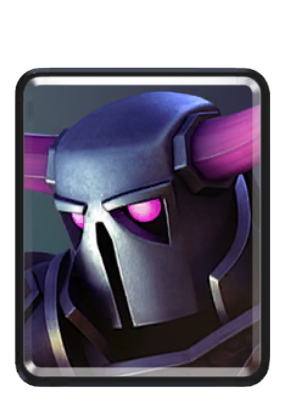

O Golem de Pedra avança lentamente, mas explode em mini-golems quando derrotado, continuando a batalha. 

{'win_percentage': 54.0, 'loss_percentage': 46.0}


In [9]:
def win_loss_percentage_with_card(card_id, start_time, end_time):
    query = '''
    SELECT bp.playerTag, b.winner
    FROM battle_players bp
    INNER JOIN battles b ON bp.battleId = b.battleId
    INNER JOIN deck_cards dc ON bp.deckId = dc.deckId
    WHERE dc.cardId = ? AND b.battleTime BETWEEN ? AND ?
    '''
    df = query_db(query, (card_id, start_time, end_time))

    total_battles = len(df)
    if total_battles == 0:
        return {"win_percentage": 0, "loss_percentage": 0}

    wins = df[df['playerTag'] == df['winner']].shape[0]
    losses = total_battles - wins

    win_percentage = (wins / total_battles) * 100
    loss_percentage = (losses / total_battles) * 100

    return {"win_percentage": win_percentage, "loss_percentage": loss_percentage}

# Exemplo de uso:
card_id = 'C005'
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'

ilustra(card_id)
print(win_loss_percentage_with_card(card_id, start_time, end_time))

<h3>Tarefa 2: Listar os decks completos que produziram mais de X% de vitórias em um intervalo de timestamps</h3>

In [10]:
def decks_with_high_win_rate(win_rate_threshold, start_time, end_time):
    query = '''
    SELECT bp.deckId, COUNT(*) as total_battles,
           SUM(CASE WHEN bp.playerTag = b.winner THEN 1 ELSE 0 END) as wins
    FROM battle_players bp
    INNER JOIN battles b ON bp.battleId = b.battleId
    WHERE b.battleTime BETWEEN ? AND ?
    GROUP BY bp.deckId
    HAVING (wins * 1.0 / total_battles) * 100 > ?
    '''
    df = query_db(query, (start_time, end_time, win_rate_threshold))
    return df

# Exemplo de uso:
win_rate_threshold = 50  # decks com mais de 50% de vitórias
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'
print(decks_with_high_win_rate(win_rate_threshold, start_time, end_time))


   deckId  total_battles  wins
0    D001              1     1
1    D002              1     1
2    D003              2     2
3    D008              3     2
4    D012              1     1
5    D017              1     1
6    D018              1     1
7    D019              2     2
8    D020              1     1
9    D021              1     1
10   D023              2     2
11   D028              3     3
12   D029              2     2
13   D034              5     4
14   D035              1     1
15   D039              1     1
16   D040              1     1
17   D042              1     1
18   D045              1     1
19   D046              1     1
20   D066              4     4
21   D080              1     1
22   D082              1     1
23   D083              1     1
24   D085              1     1
25   D086              1     1
26   D098              3     2
27   D102              1     1
28   D108              1     1
29   D113              1     1
30   D119              1     1
31   D12

<h3>Tarefa 3: Calcular a quantidade de derrotas utilizando um combo de cartas em um intervalo de timestamps</h3>

In [11]:
def losses_with_card_combo(card_ids, start_time, end_time):
    card_placeholders = ', '.join('?' for _ in card_ids)
    query = f'''
    SELECT bp.battleId, COUNT(DISTINCT dc.cardId) as card_count
    FROM battle_players bp
    INNER JOIN battles b ON bp.battleId = b.battleId
    INNER JOIN deck_cards dc ON bp.deckId = dc.deckId
    WHERE dc.cardId IN ({card_placeholders}) AND b.battleTime BETWEEN ? AND ?
    GROUP BY bp.battleId
    HAVING card_count = ?
    '''
    df = query_db(query, (*card_ids, start_time, end_time, len(card_ids)))

    total_battles = len(df)
    losses = total_battles - df[df['battleId'].isin(df['battleId'])].shape[0]

    return {"losses": losses}

# Exemplo de uso:
card_ids = ['C002', 'C003']
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'
print(losses_with_card_combo(card_ids, start_time, end_time))


{'losses': 0}


<center><h3>Tarefa 3 versão 2 - utilizando apenas Python, sem SQL</h3></center>

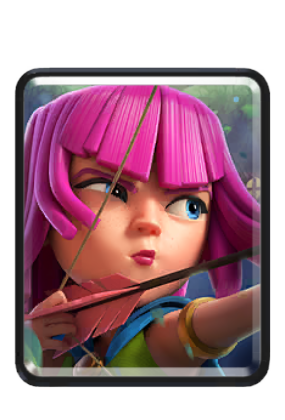

O Mago de Gelo congela seus inimigos com uma rajada de frio ártico, desacelerando seus movimentos. 



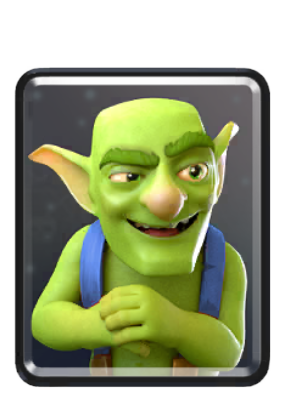

O Cavaleiro Fantasma emerge das sombras para causar dano letal antes de desaparecer sem deixar rastros. 



11

In [12]:
card_ids = ['C002', 'C003']
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'

def derrotas_e_vitorias_do_combo(card_ids, start_time='1700-01-01T00:00:00', end_time='2200-01-01T00:00:00'):
    derrotas_do_combo = 0
    vitorias_do_combo = 0
    for batalha in df_battles[(df_battles['battleTime'] >= start_time) & (df_battles['battleTime'] <= end_time)]['battleId']:
        df_participantes = df_battle_players[df_battle_players['battleId']==batalha]
        vencedor = df_battles[df_battles['battleId']==batalha]['winner'].iloc[0]

        deque_perdedor = df_participantes.loc[df_participantes['playerTag'] != vencedor, 'deckId'].iloc[0]
        deque_vencedor = df_participantes.loc[df_participantes['playerTag'] == vencedor, 'deckId'].iloc[0]
        cartas_perdedoras = df_deck_cards[df_deck_cards['deckId']==deque_perdedor]['cardId'].tolist()
        cartas_vencedoras = df_deck_cards[df_deck_cards['deckId']==deque_vencedor]['cardId'].tolist()    
        if all([card in cartas_perdedoras for card in card_ids]):
            derrotas_do_combo+=1
        if all([card in cartas_vencedoras for card in card_ids]):
            vitorias_do_combo+=1
    return derrotas_do_combo, vitorias_do_combo


for carta in card_ids:
    ilustra(carta)

derrotas_do_combo, _ = derrotas_e_vitorias_do_combo(card_ids, start_time, end_time)
derrotas_do_combo

<h3>Tarefa 4: Calcular a quantidade de vitórias envolvendo a carta X onde o vencedor possui Z% menos troféus que o perdedor, a partida durou menos de 2 minutos, e o perdedor derrubou ao menos duas torres</h3>

In [13]:
def wins_with_card_under_conditions(card_id, trophy_diff_percentage, start_time, end_time):
    query = '''
    SELECT bp.battleId, bp.playerTag, bp.startingTrophies, b.winner, b.battleTime,
           (bp.kingTowerHitPoints + bp.princessTowerHitPoints) as totalHitPoints
    FROM battle_players bp
    INNER JOIN battles b ON bp.battleId = b.battleId
    INNER JOIN deck_cards dc ON bp.deckId = dc.deckId
    WHERE dc.cardId = ? AND b.battleTime BETWEEN ? AND ? AND totalHitPoints < 2
    '''
    df = query_db(query, (card_id, start_time, end_time))
    
    # Filtrando as condições adicionais
    filtered_df = df[(df['winner'] == df['playerTag']) & 
                     ((df['startingTrophies'] * (1 - trophy_diff_percentage / 100)) > df['startingTrophies']) & 
                     (pd.to_datetime(df['battleTime']) - pd.to_datetime(df['battleTime']) < pd.Timedelta(minutes=2))]
    
    wins = filtered_df.shape[0]
    
    return {"wins": wins}

# Exemplo de uso:
card_id = 'C001'
trophy_diff_percentage = 20
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'

print(wins_with_card_under_conditions(card_id, trophy_diff_percentage, start_time, end_time))


{'wins': 0}


<center><h3>Tarefa 4 versão 2 - utilizando apenas Python, sem SQL</h3></center>

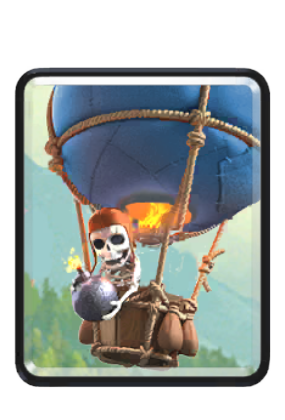

O Barril de Esqueletos lança um exército de esqueletos direto na linha de frente inimiga. 



1

In [14]:
# Exemplo de uso:
card_id = 'C007'
trophy_diff_percentage = 20
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'

#######
qtd_vitorias = 0
# Definir o limite de 2 minutos
two_minutes = timedelta(minutes=2)
# Criar o filtro
battle_duration_filter = df_battles['battleDuration'] <= two_minutes
for batalha in df_battles[(df_battles['battleTime'] >= start_time) & \
                          (df_battles['battleTime'] <= end_time) & \
                           battle_duration_filter]['battleId']:
    df_participantes = df_battle_players[df_battle_players['battleId']==batalha]
    vencedor = df_battles[df_battles['battleId']==batalha]['winner'].iloc[0]
    filtro_vencedor = df_participantes['playerTag']==vencedor
    trofeus_do_vencedor = df_participantes[filtro_vencedor]['startingTrophies'].iloc[0]
    trofeus_do_perdedor = df_participantes[~filtro_vencedor]['startingTrophies'].iloc[0]
    # Assumindo que o número de crownsEarned equivalha ao número de torres derrubadas:
    torres_derrubadas_pelo_perdedor = df_participantes[~filtro_vencedor]['crownsEarned'].iloc[0]
    vencedor_tem_menos_trofeus = trofeus_do_vencedor <= trofeus_do_perdedor * (1 - trophy_diff_percentage / 100)
    if vencedor_tem_menos_trofeus and (torres_derrubadas_pelo_perdedor >= 2):
        deque_vencedor = df_participantes.loc[df_participantes['playerTag'] == vencedor, 'deckId'].iloc[0]
        cartas_vencedoras = df_deck_cards[df_deck_cards['deckId']==deque_vencedor]['cardId'].tolist() 
        if card_id in cartas_vencedoras:
            qtd_vitorias+=1

ilustra(card_id)

qtd_vitorias

<h3>Tarefa 5: Listar o combo de cartas de tamanho N que produziram mais de Y% de vitórias em um intervalo de timestamps</h3>

In [15]:
def card_combos_with_high_win_rate(combo_size, win_rate_threshold, start_time, end_time):
    query = f'''
    SELECT bp.deckId, dc.cardId, COUNT(*) as total_battles,
           SUM(CASE WHEN bp.playerTag = b.winner THEN 1 ELSE 0 END) as wins
    FROM battle_players bp
    INNER JOIN battles b ON bp.battleId = b.battleId
    INNER JOIN deck_cards dc ON bp.deckId = dc.deckId
    WHERE b.battleTime BETWEEN ? AND ?
    GROUP BY bp.deckId, dc.cardId
    HAVING COUNT(DISTINCT dc.cardId) = ? AND (wins * 1.0 / total_battles) * 100 > ?
    '''
    df = query_db(query, (start_time, end_time, combo_size, win_rate_threshold))
    return df

# Exemplo de uso:
combo_size = 2
win_rate_threshold = 50  # combos com mais de 50% de vitórias
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'
print(card_combos_with_high_win_rate(combo_size, win_rate_threshold, start_time, end_time))


Empty DataFrame
Columns: [deckId, cardId, total_battles, wins]
Index: []


<center><h3>Tarefa 5 versão 2 - utilizando apenas Python, sem SQL</h3></center>

In [16]:
combo_size = 3
win_rate_threshold = 50  # combos com mais de 50% de vitórias
start_time = '2023-01-01T00:00:00'
end_time = '2024-12-31T23:59:59'

# Esta célula exige paciência pois ela demora bastante para fornecer o resultado

def get_card_combinations(df_cards, N):
    card_ids = df_cards['cardId'].tolist()
    return list(combinations(card_ids, N))

# Exemplo de uso:
N = combo_size  # Substitua pelo número desejado de cartas na combinação
card_combinations = get_card_combinations(df_cards, N)

dicio_combos = {}

for combination in card_combinations:
    derrotas, vitorias = derrotas_e_vitorias_do_combo(combination,
                                                      start_time,
                                                      end_time)
    if (derrotas + vitorias) != 0:
        percent_vitoria = vitorias/(derrotas + vitorias)
    else:
        percent_vitoria = None
    dicio_combos[str(combination)] = percent_vitoria

df_combos = pd.DataFrame(dicio_combos, index=['pct_vitorias']).transpose()
df_combos[df_combos['pct_vitorias']>win_rate_threshold/100]

,pct_vitorias
"('C001', 'C002', 'C003')",0.571429
"('C001', 'C002', 'C006')",0.714286
"('C001', 'C002', 'C007')",1.0
"('C001', 'C002', 'C008')",0.714286
"('C001', 'C002', 'C013')",0.666667
...,...
"('C014', 'C018', 'C020')",0.8
"('C015', 'C017', 'C018')",0.833333
"('C016', 'C017', 'C018')",1.0
"('C016', 'C018', 'C020')",0.625


<h3>Consultas adicionais I - Taxa de vitórias por raridade da carta</h3>
<p><i>Nesta consulta analisaremos o desempenho de cartas de diferentes raridades (comum, rara, épica, lendária) em todas as batalhas. A proposta é auxiliar a identificar se cartas de raridades específicas apresentam desempenho superior ou inferior.</i></p>

In [17]:
def win_rate_by_rarity():
    query = '''
    SELECT c.rarity, COUNT(*) as total_battles,
           SUM(CASE WHEN bp.playerTag = b.winner THEN 1 ELSE 0 END) as wins
    FROM cards c
    INNER JOIN deck_cards dc ON c.cardId = dc.cardId
    INNER JOIN battle_players bp ON dc.deckId = bp.deckId
    INNER JOIN battles b ON bp.battleId = b.battleId
    GROUP BY c.rarity
    '''
    df = query_db(query)
    
    df['win_rate'] = (df['wins'] / df['total_battles']) * 100
    return df

# Exemplo de uso:
print(win_rate_by_rarity())


      rarity  total_battles  wins   win_rate
0     common            389   196  50.385604
1       epic            324   157  48.456790
2  legendary            401   199  49.625935
3       rare            486   248  51.028807


<h3>Consultas adicionais II - Análise de diversidade de decks</h3>
<p><i>Nesta consulta examinaremos a variedade dos decks utilizados em partidas com alta taxa de troféus. A baixa diversidade de cartas no deck pode ser um indício de que certas combinações se tornam muito poderosas e precisam de equilíbrio.</i></p>

In [18]:
def deck_diversity(high_trophy_threshold):
    query = '''
    SELECT bp.deckId, COUNT(DISTINCT dc.cardId) as unique_cards
    FROM battle_players bp
    INNER JOIN deck_cards dc ON bp.deckId = dc.deckId
    INNER JOIN players p ON bp.playerTag = p.playerTag
    WHERE p.trophies > ?
    GROUP BY bp.deckId
    '''
    df = query_db(query, (high_trophy_threshold,))
    
    return df

# Exemplo de uso:
high_trophy_threshold = 5000  # Ajuste este valor conforme necessário
print(deck_diversity(high_trophy_threshold))


   deckId  unique_cards
0    D002             5
1    D003             7
2    D007             6
3    D008             7
4    D019             6
5    D029             7
6    D034             7
7    D041             6
8    D042             8
9    D043             7
10   D045             6
11   D064             6
12   D066             5
13   D075             5
14   D076             7
15   D079             8
16   D124             7
17   D133             8
18   D144             7
19   D150             7
20   D152             8
21   D153             8
22   D163             6
23   D174             8
24   D178             7
25   D200             6


<h3>Consultas adicionais III - Taxa de uso do card vs taxa de vitórias</h3>
<p><i>Nesta consulta compararemos a frequência de uso de um card com sua taxa de ganho. Cards com altas taxas de utilização mas com baixas taxas de ganho podem ser consideradas mais fortes do que realmente são, enquanto cards com baixas taxas de utilização mas altas taxas de vitórias podem ser subvalorizados. </i></p>

In [19]:
def card_usage_vs_win_rate():
    query = '''
    SELECT c.cardId, c.name, c.rarity,
           COUNT(*) as usage_count,
           SUM(CASE WHEN bp.playerTag = b.winner THEN 1 ELSE 0 END) as wins
    FROM cards c
    INNER JOIN deck_cards dc ON c.cardId = dc.cardId
    INNER JOIN battle_players bp ON dc.deckId = bp.deckId
    INNER JOIN battles b ON bp.battleId = b.battleId
    GROUP BY c.cardId
    '''
    df = query_db(query)
    
    df['win_rate'] = (df['wins'] / df['usage_count']) * 100
    return df

# Exemplo de uso:
print(card_usage_vs_win_rate())


   cardId    name     rarity  usage_count  wins   win_rate
0    C001   Card1       rare           65    27  41.538462
1    C002   Card2  legendary           80    43  53.750000
2    C003   Card3       epic           76    33  43.421053
3    C004   Card4  legendary           91    45  49.450549
4    C005   Card5     common          100    54  54.000000
5    C006   Card6       rare           93    54  58.064516
6    C007   Card7     common           78    45  57.692308
7    C008   Card8       rare          102    55  53.921569
8    C009   Card9     common           61    30  49.180328
9    C010  Card10  legendary           81    40  49.382716
10   C011  Card11     common           66    23  34.848485
11   C012  Card12       epic           80    36  45.000000
12   C013  Card13       epic           76    39  51.315789
13   C014  Card14  legendary           77    33  42.857143
14   C015  Card15       rare           68    33  48.529412
15   C016  Card16       rare           87    44  50.5747